<a href="https://colab.research.google.com/github/eperezd/100-Days-Of-ML-Code/blob/master/Copia_de_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

In [4]:
df_data=pd.read_excel('/content/drive/MyDrive/data1-afocat.xlsx')
df_data.shape

(1048575, 28)

In [5]:
df_data1=pd.read_excel('/content/drive/MyDrive/data2-afocat.xlsx')
df_data1.shape

(550009, 28)

In [6]:
frames = [df_data, df_data1]
df=pd.concat(frames)
df.head(5)

,Sexo,dia_nac,mes_nac,anno_nac,Edad,Tipo_Persona,ID_MARCA,Modelo,anno_v,Nro_Asientos,...,Hora_Emision,min_emision,cNRD,Ambito_Aplicacion,Placa_V,Punto_Venta,lejania,nveces,motivo,tipo_socio
0,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,3,6,2,3
1,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,2,7,8,3,1
2,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,9,3,3,2
3,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,5,8,4,5,1
4,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,6,5,2,3


In [11]:
df.to_csv('data_modelo.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598584 entries, 0 to 550008
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Sexo                1598584 non-null  int64         
 1   dia_nac             1598584 non-null  int64         
 2   mes_nac             1598584 non-null  int64         
 3   anno_nac            1598584 non-null  int64         
 4   Edad                1598584 non-null  int64         
 5   Tipo_Persona        1598584 non-null  int64         
 6   ID_MARCA            1598584 non-null  int64         
 7   Modelo              1598584 non-null  int64         
 8   anno_v              1598584 non-null  int64         
 9   Nro_Asientos        1598584 non-null  int64         
 10  Categoria_Vehiculo  1598584 non-null  int64         
 11  Uso_vehiculo        1598584 non-null  int64         
 12  Clase_Vehicular     1598584 non-null  int64         
 13  Tipo_Carrocer

In [ ]:
pip install pycaret

In [ ]:
pip install sweetviz

In [10]:
import pandas as pd
import numpy as np
import sweetviz


# Modelado

from pycaret.classification import *
#from pycaret.utils import check_metric
import multiprocessing
import pickle
import joblib

# Fechas y horas
import time
from datetime import date
from datetime import timedelta

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Propiedades visualizacion
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598584 entries, 0 to 550008
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Sexo                1598584 non-null  int64         
 1   dia_nac             1598584 non-null  int64         
 2   mes_nac             1598584 non-null  int64         
 3   anno_nac            1598584 non-null  int64         
 4   Edad                1598584 non-null  int64         
 5   Tipo_Persona        1598584 non-null  int64         
 6   ID_MARCA            1598584 non-null  int64         
 7   Modelo              1598584 non-null  int64         
 8   anno_v              1598584 non-null  int64         
 9   Nro_Asientos        1598584 non-null  int64         
 10  Categoria_Vehiculo  1598584 non-null  int64         
 11  Uso_vehiculo        1598584 non-null  int64         
 12  Clase_Vehicular     1598584 non-null  int64         
 13  Tipo_Carrocer

In [13]:
# Fechas para referencia
fecha = date.today()
fecha = fecha.strftime('%Y%m%d')

In [14]:
# Revisamos las proporciones de clientes que han comprado
pd.crosstab(df.cNRD,
            df.cNRD,
            normalize = True)

cNRD,0,1
cNRD,,
0,0.08,0.00
1,0.00,0.92


In [22]:
df.head(5)

,Sexo,dia_nac,mes_nac,anno_nac,Edad,Tipo_Persona,ID_MARCA,Modelo,anno_v,Nro_Asientos,...,Hora_Emision,min_emision,cNRD,Ambito_Aplicacion,Placa_V,Punto_Venta,lejania,nveces,motivo,tipo_socio
0,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,3,6,2,3
1,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,2,7,8,3,1
2,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,9,3,3,2
3,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,5,8,4,5,1
4,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,6,5,2,3


In [17]:
df.shape

(1598584, 28)

In [ ]:
# Transformaciones
#Cat_Features = ['Sexo', 'dia_nac','mes_nac','Anno_nac','edad','nPerTipoPersona','Marca','Modelo','anno_v','Nro_Asientos','Categoria_Vehiculo',
 #                 'Uso_vehiculo','Clase_Vehicular','Tipo_Carroceria','dia_emision','mes_emision','anno_emision','hora_emision','min_emiso','cNRD','Ambito_Aplicacion',
  #              'Punto_Venta','lejania','nveces','motivo','tipo_socio'] # variables categoricas

#for v in Cat_Features:
 #   df_data[v] = df_data[v].astype('category')

In [ ]:
eda_obj = sweetviz.analyze(df, target_feat = 'cNRD')

eda_obj.show_html('EDA_PTMO_' + fecha + '.html',
                 layout = 'widescreen',
                 scale = 0.8)

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_PTMO_20231031.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598584 entries, 0 to 550008
Data columns (total 28 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Sexo                1598584 non-null  int64         
 1   dia_nac             1598584 non-null  int64         
 2   mes_nac             1598584 non-null  int64         
 3   anno_nac            1598584 non-null  int64         
 4   Edad                1598584 non-null  int64         
 5   Tipo_Persona        1598584 non-null  int64         
 6   ID_MARCA            1598584 non-null  int64         
 7   Modelo              1598584 non-null  int64         
 8   anno_v              1598584 non-null  int64         
 9   Nro_Asientos        1598584 non-null  int64         
 10  Categoria_Vehiculo  1598584 non-null  int64         
 11  Uso_vehiculo        1598584 non-null  int64         
 12  Clase_Vehicular     1598584 non-null  int64         
 13  Tipo_Carrocer

In [ ]:
Num_Features = ['Sexo',
                'Edad',
                'Tipo_Persona',
                'ID_MARCA',
                'Modelo',
                'anno_v',
                'Nro_Asientos',
                'Categoria_Vehiculo',
                'Uso_vehiculo',
                'Clase_Vehicular'] # variables categoricas

objetivo = 'cNRD'

sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(10, 2, figsize = (15,15), dpi = 200, gridspec_kw = {'width_ratios': [1, 2]})

for i, col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data = df, x = objetivo, y = col, ax = ax[i,0])
    # kde Plot
    sns.kdeplot(data = df[df[objetivo] == 0], x = col, fill = True, linewidth = 2, ax = ax[i,1], label = '0')
    sns.kdeplot(data = df[df[objetivo] == 1], x = col, fill = True, linewidth = 2, ax = ax[i,1], label = '1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title = 'Gestion de Afiliaciones', loc = 'upper right')
    # Agrega el tamaño para cada barra
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Variable snumericas y objetivo', fontsize = 22)
plt.tight_layout()
plt.show()

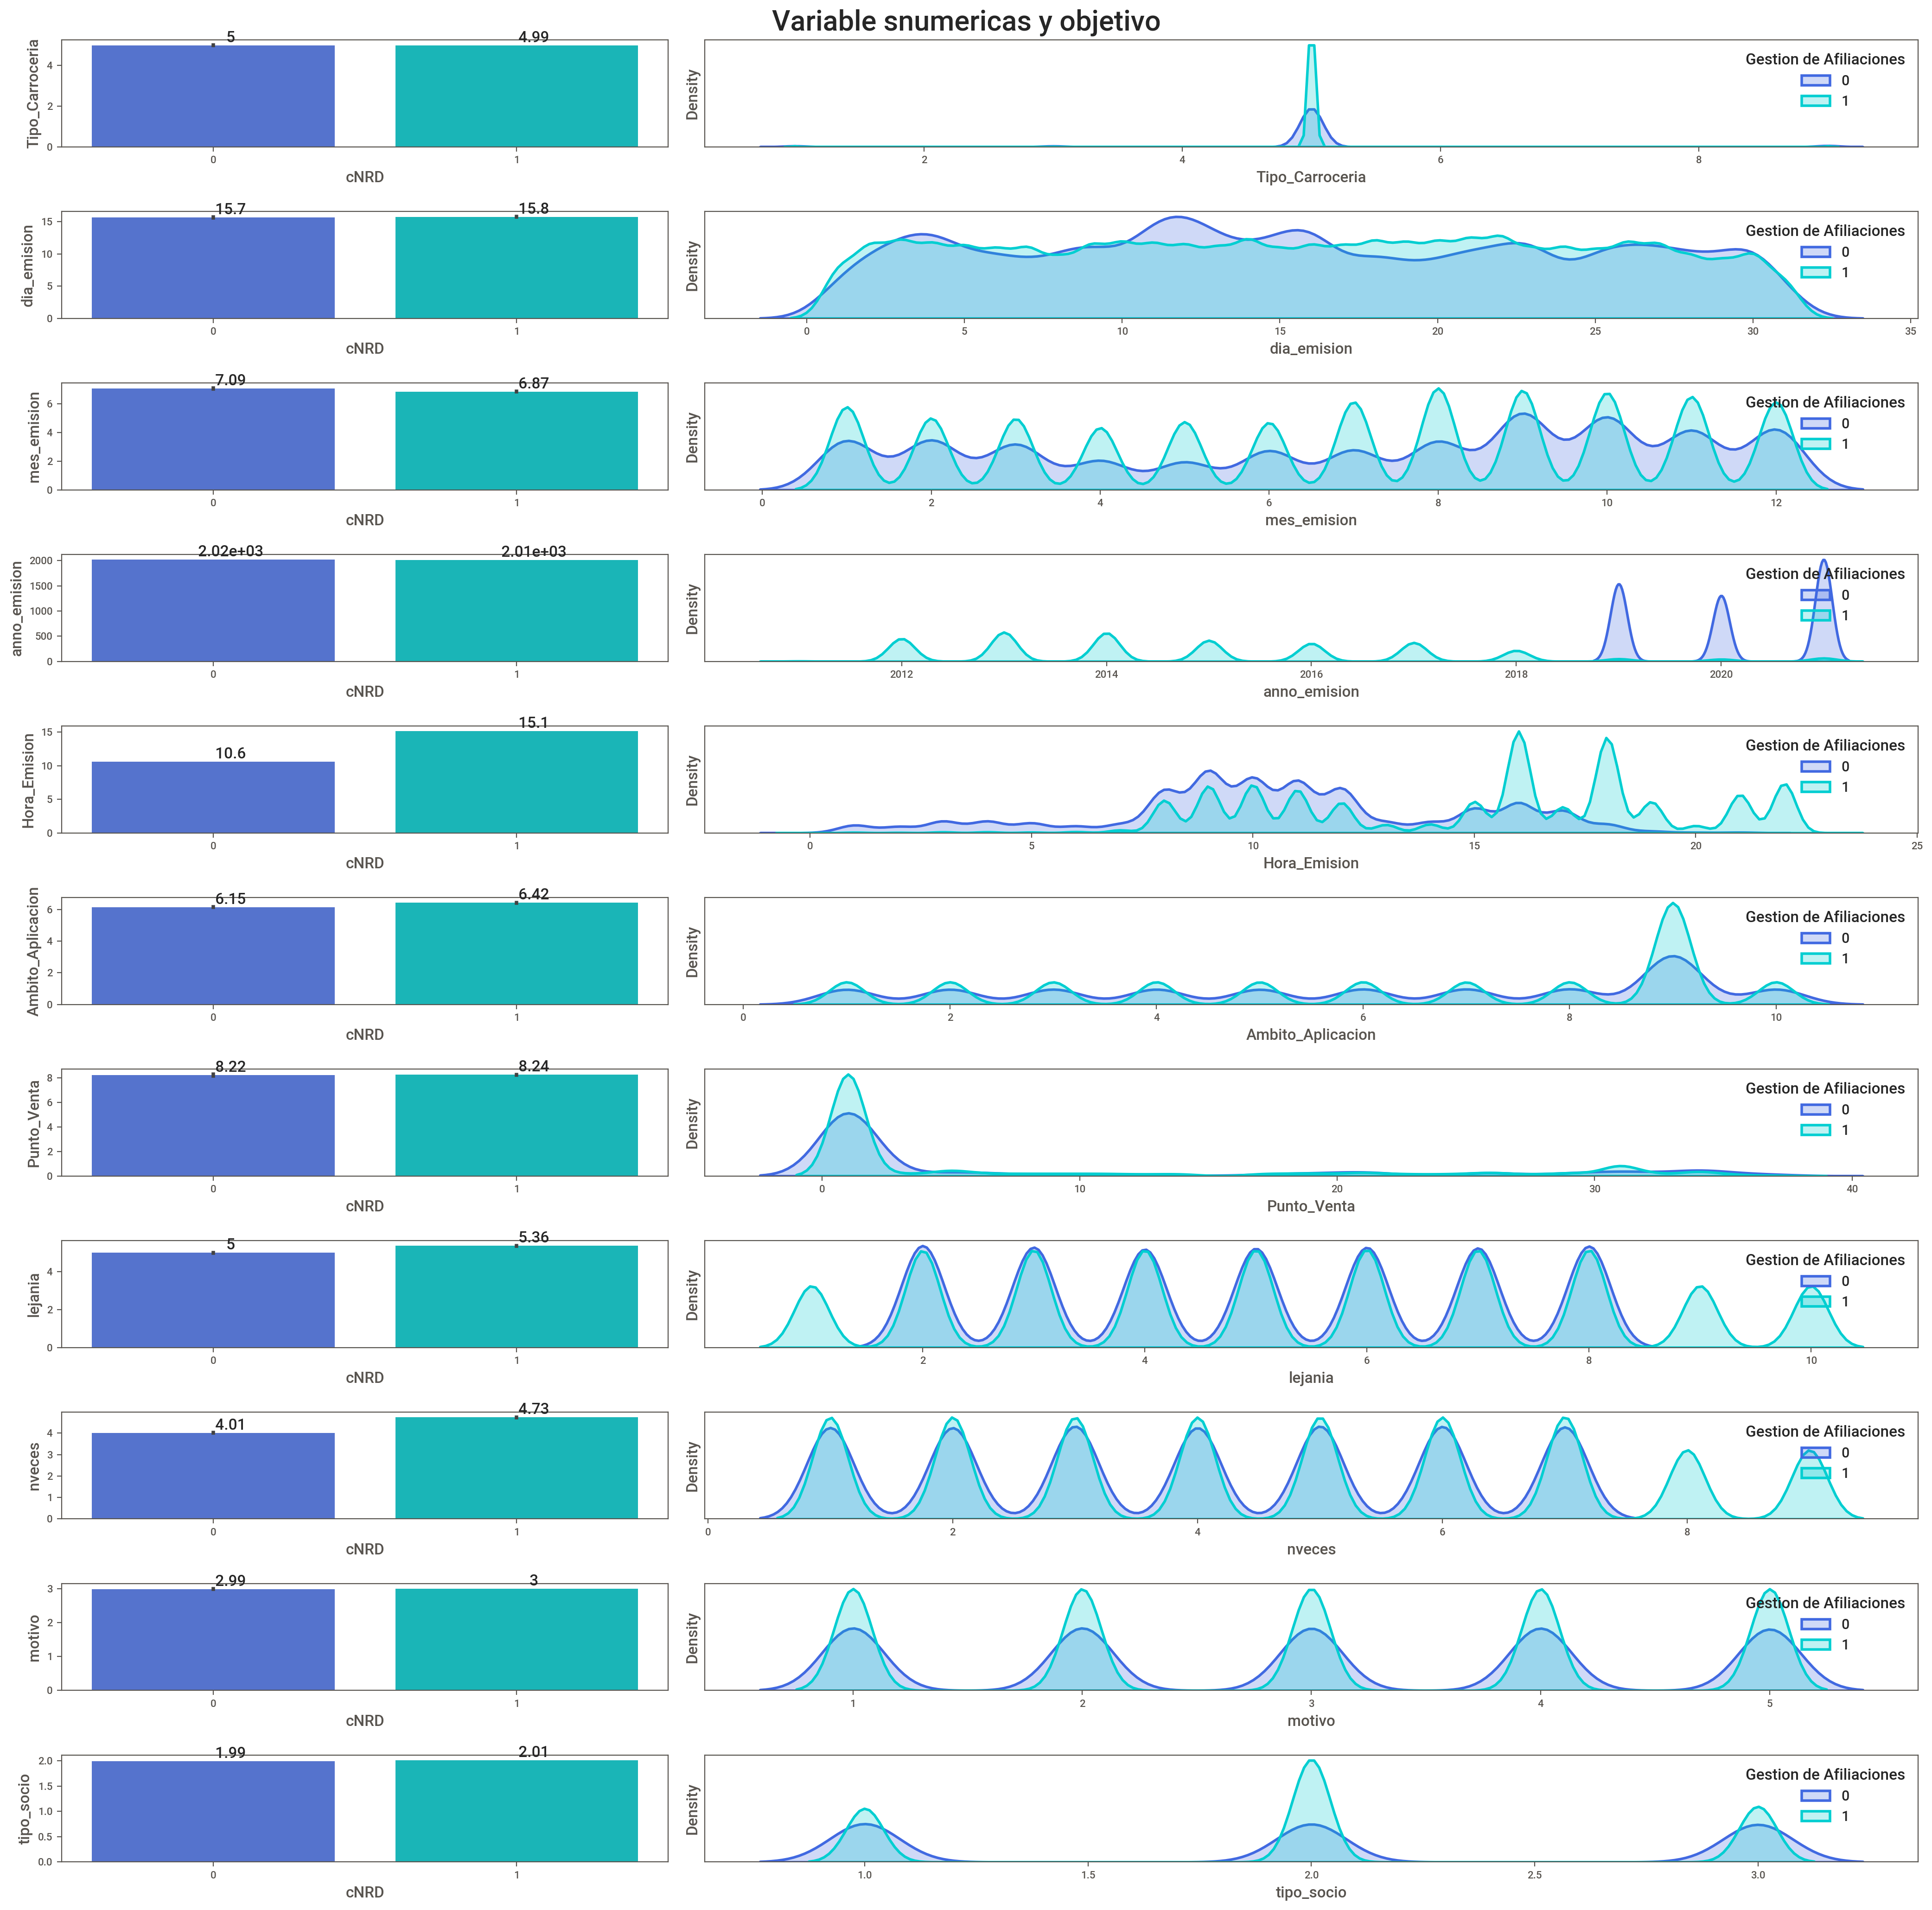

In [ ]:
Num_Features = ['Tipo_Carroceria',
                'dia_emision',
                'mes_emision',
                'anno_emision',
                'Hora_Emision',
                'Ambito_Aplicacion',
                'Punto_Venta',
                'lejania',
                'nveces',
                'motivo',
                'tipo_socio'] # variables categoricas

objetivo = 'cNRD'

sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(11, 2, figsize = (21,21), dpi = 200, gridspec_kw = {'width_ratios': [1, 2]})

for i, col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data = df, x = objetivo, y = col, ax = ax[i,0])
    # kde Plot
    sns.kdeplot(data = df[df[objetivo] == 0], x = col, fill = True, linewidth = 2, ax = ax[i,1], label = '0')
    sns.kdeplot(data = df[df[objetivo] == 1], x = col, fill = True, linewidth = 2, ax = ax[i,1], label = '1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title = 'Gestion de Afiliaciones', loc = 'upper right')
    # Agrega el tamaño para cada barra
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Variable snumericas y objetivo', fontsize = 22)
plt.tight_layout()
plt.show()

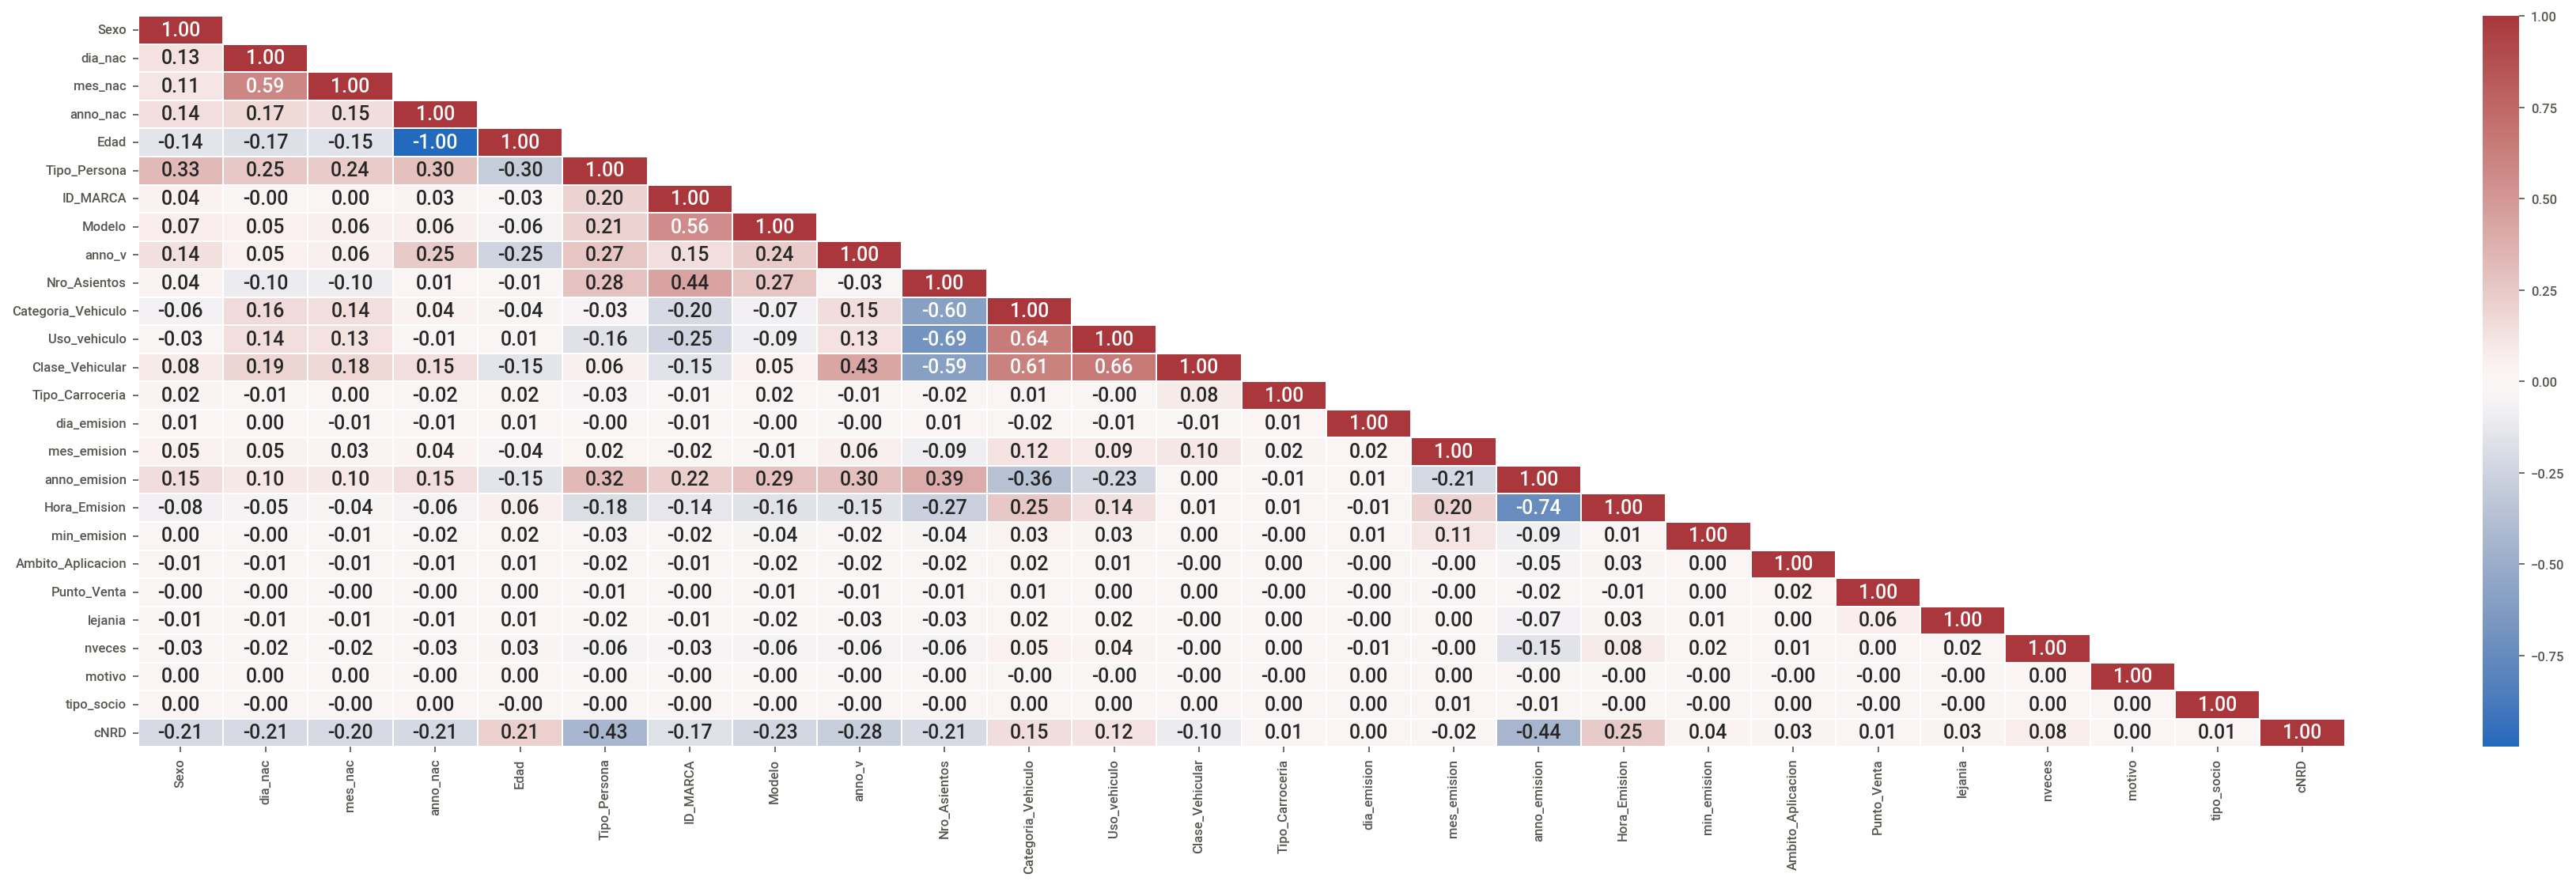

In [ ]:
# Calculo de correlacion
objetivo = 'cNRD'
df_ord = pd.concat([df.drop(objetivo, axis=1), df[objetivo]],axis=1)
corr = df_ord.corr(method = 'spearman')

# Creamos una mascara para ver la correlacion en un solo lado
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Crea el mapa de correlacion
plt.figure(figsize=(30, 8), dpi = 150)
sns.heatmap(corr, mask=mask, annot=True, cmap='vlag', fmt='.2f', linewidths=0.2)
plt.show()

In [ ]:
df_nuevo=df.rename(columns = {'incremento': 'cNRD'},
         inplace = True)

In [ ]:
df.head(5)

,Sexo,dia_nac,mes_nac,anno_nac,Edad,Tipo_Persona,ID_MARCA,Modelo,anno_v,Nro_Asientos,...,Hora_Emision,min_emision,cNRD,Ambito_Aplicacion,Placa_V,Punto_Venta,lejania,nveces,motivo,tipo_socio
0,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,3,6,2,3
1,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,2,7,8,3,1
2,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,9,3,3,2
3,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,5,8,4,5,1
4,1,6,9,1982,39,1,1,1,2006,2,...,21,59,1,9,NM-13372,1,6,5,2,3


In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(df, target = 'cNRD', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cNRD
2,Target type,Binary
3,Original data shape,"(1598584, 28)"
4,Transformed data shape,"(1598584, 30)"
5,Transformed train set shape,"(1119008, 30)"
6,Transformed test set shape,"(479576, 30)"
7,Numeric features,25
8,Date features,1
9,Categorical features,1


In [26]:
df.shape

(1598584, 28)

In [27]:
# Verificamos proporción para entrenamiento

(get_config('y_train').value_counts()) / len(get_config('y_train')) * 100

1   92.24
0    7.76
Name: cNRD, dtype: float64

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [28]:
%%time
# Generamos primer entrenamiento y vemos resultados

best = compare_models(sort = 'f1',
                      fold = 10,
                      #exclude = ['dummy', 'nb', 'lda', 'qda', 'et', 'ada', 'ridge', 'svm'],
                      include = ['dt', 'rf', 'lr'],
                      n_select = 3
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,10.5050
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,117.0300
lr,Logistic Regression,0.9718,0.9932,0.9854,0.9840,0.9847,0.8015,0.8016,121.7680


Processing:   0%|          | 0/19 [00:00<?, ?it/s]

CPU times: user 8min 56s, sys: 1min 14s, total: 10min 10s
Wall time: 48min


In [29]:
# capturo resultados de evaluacion inicial
best_resumen = pull()
best_resumen.to_excel('resultados_Mod_' + fecha + '.xlsx', index = False)

In [30]:
# Revisamos a detalle los mejores n modelos

mod = best[0]

evaluate_model(mod)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
# Exporta graficos del modelo optimizado

plot_model(mod, plot = 'feature', save = True)
plot_model(mod, plot = 'feature_all', save = True)
plot_model(mod, plot = 'confusion_matrix', save = True)
plot_model(mod, plot = 'auc', save = True)
plot_model(mod, plot = 'class_report', save = True)

'Class Report.png'

In [34]:
df1= predict_model(mod)
df1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Sexo,dia_nac,mes_nac,anno_nac,Edad,Tipo_Persona,ID_MARCA,Modelo,anno_v,Nro_Asientos,...,Ambito_Aplicacion,Placa_V,Punto_Venta,lejania,nveces,motivo,tipo_socio,cNRD,prediction_label,prediction_score
1311964,1,31,12,2002,18,1,2,6,2017,5,...,9,M4N-596,1,3,1,1,2,1,1,1.00
618645,1,16,7,1956,65,1,10,100,1995,5,...,9,BC-4227,1,9,3,2,2,1,1,1.00
1083712,1,31,12,2002,18,2,2,6,2014,5,...,4,S1H-605,1,5,3,3,2,1,1,1.00
361629,1,18,4,1941,80,1,2,4,1992,5,...,3,SGL-865,26,6,1,4,2,1,1,1.00
1207141,1,1,1,1982,39,1,13,34,1998,3,...,9,TL-1404,1,8,7,5,2,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198191,1,12,10,1972,49,1,5,36,2003,5,...,6,M1I-521,1,9,1,1,2,1,1,1.00
680438,1,20,3,1995,26,1,28,25,2013,2,...,2,1620-5B,1,10,8,1,2,1,1,1.00
1410460,1,4,2,1965,56,1,1,58,2003,2,...,9,MX-19027,31,6,6,5,3,1,1,1.00
385417,1,8,4,1985,36,1,1,1,2012,2,...,2,MA-3903,1,1,3,5,3,1,1,1.00


In [35]:
df1.to_excel('pronosticos.xlsx')

In [32]:
# Predicciones

predict_model(mod)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Sexo,dia_nac,mes_nac,anno_nac,Edad,Tipo_Persona,ID_MARCA,Modelo,anno_v,Nro_Asientos,...,Ambito_Aplicacion,Placa_V,Punto_Venta,lejania,nveces,motivo,tipo_socio,cNRD,prediction_label,prediction_score
1311964,1,31,12,2002,18,1,2,6,2017,5,...,9,M4N-596,1,3,1,1,2,1,1,1.00
618645,1,16,7,1956,65,1,10,100,1995,5,...,9,BC-4227,1,9,3,2,2,1,1,1.00
1083712,1,31,12,2002,18,2,2,6,2014,5,...,4,S1H-605,1,5,3,3,2,1,1,1.00
361629,1,18,4,1941,80,1,2,4,1992,5,...,3,SGL-865,26,6,1,4,2,1,1,1.00
1207141,1,1,1,1982,39,1,13,34,1998,3,...,9,TL-1404,1,8,7,5,2,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198191,1,12,10,1972,49,1,5,36,2003,5,...,6,M1I-521,1,9,1,1,2,1,1,1.00
680438,1,20,3,1995,26,1,28,25,2013,2,...,2,1620-5B,1,10,8,1,2,1,1,1.00
1410460,1,4,2,1965,56,1,1,58,2003,2,...,9,MX-19027,31,6,6,5,3,1,1,1.00
385417,1,8,4,1985,36,1,1,1,2012,2,...,2,MA-3903,1,1,3,5,3,1,1,1.00


In [33]:
# Finaliza entrenamiento

modelo_final = finalize_model(mod)

In [ ]:
save_model(modelo_final, 'modelo_propension_v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['Fecha_Emision_Cat'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Sexo', 'dia_nac', 'mes_nac',
                                              'anno_nac', 'Edad', 'Tipo_Persona',
                                              'ID_MARCA', 'Modelo', 'ann...
                                                               min_samples_leaf=20,
                                                               return_df=True,
                                                               smoothi